# Exploratory Data Analysis

In [2]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

%matplotlib inline

In [11]:
dataset = 'https://raw.githubusercontent.com/farizalmustaqim/ml-zoomcamp/main/07-midterm/full_data.csv'

In [8]:
!wget $dataset

--2023-11-04 13:36:12--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2023-11-04 13:36:12--  https://raw.githubusercontent.com/farizalmustaqim/Project-Brain-Stroke-Prediction/main/Dataset/full_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 290771 (284K) [text/plain]
Saving to: ‘full_data.csv.3’

full_data.csv.3     100%[===================>] 283,96K  --.-KB/s    in 0,1s    

2023-11-04 13:36:13 (2,70 MB/s) - ‘full_data.csv.3’ saved [290771/290771]

FINISHED --2023-11-04 13:36:13--
Total wall clock time: 0,2s
Downloaded: 1 files, 284K in 0,1s (2,70 MB/s)


In [12]:
data = pd.read_csv(dataset)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [187]:
df = data.copy()
df.head(6)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [188]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [189]:
df.shape

(4981, 11)

In [190]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicated rows: ', duplicate_rows_df.shape)

number of duplicated rows:  (0, 11)


In [191]:
df.count()

gender               4981
age                  4981
hypertension         4981
heart_disease        4981
ever_married         4981
work_type            4981
Residence_type       4981
avg_glucose_level    4981
bmi                  4981
smoking_status       4981
stroke               4981
dtype: int64

In [192]:
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Univariate Analysis

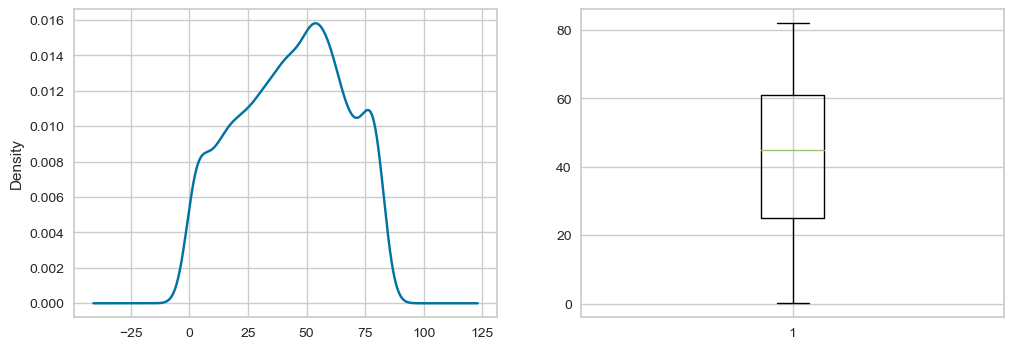

In [193]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['age'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['age'])
plt.show()

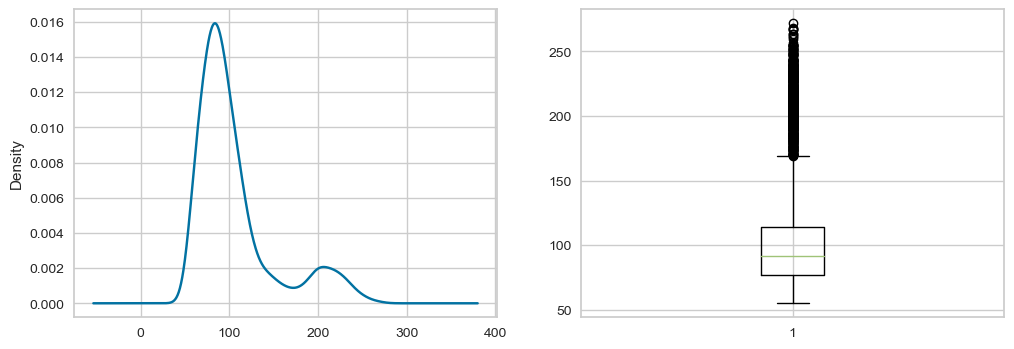

In [194]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['avg_glucose_level'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['avg_glucose_level'])
plt.show()

<Axes: xlabel='avg_glucose_level'>

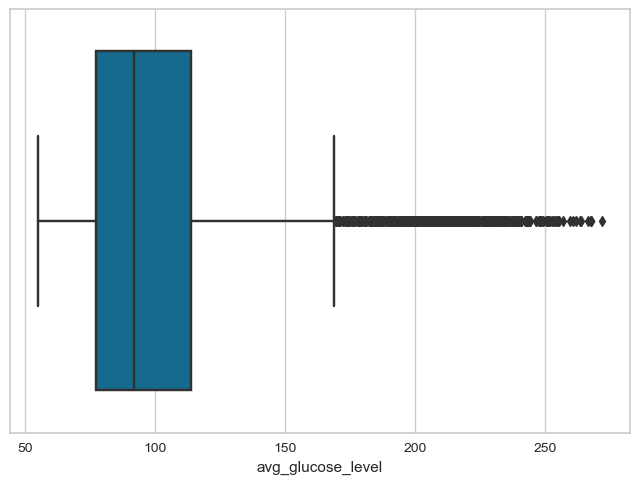

In [195]:
sns.boxplot(x=df['avg_glucose_level'])

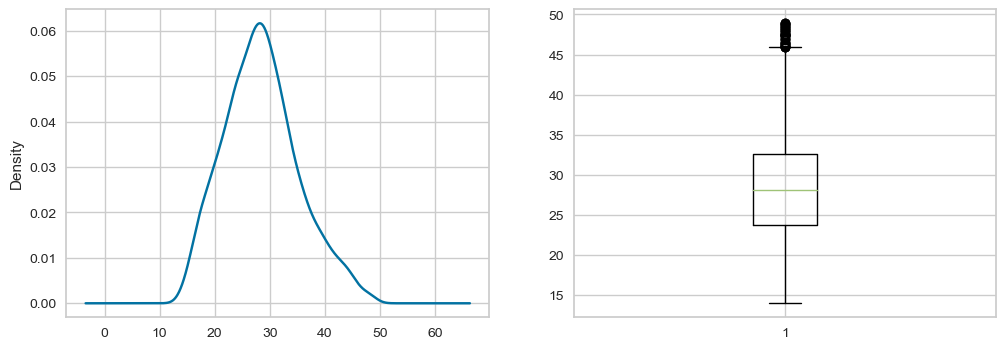

In [196]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['bmi'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['bmi'])
plt.show()

<Axes: xlabel='bmi'>

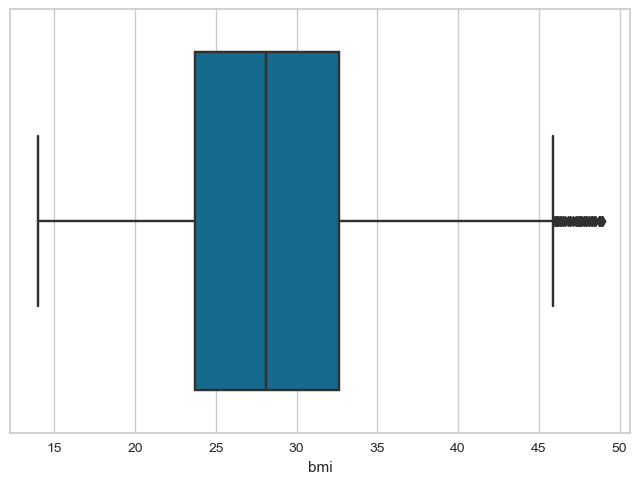

In [197]:
sns.boxplot(x=df['bmi'])

In [198]:
df.age.describe()

count    4981.000000
mean       43.419859
std        22.662755
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

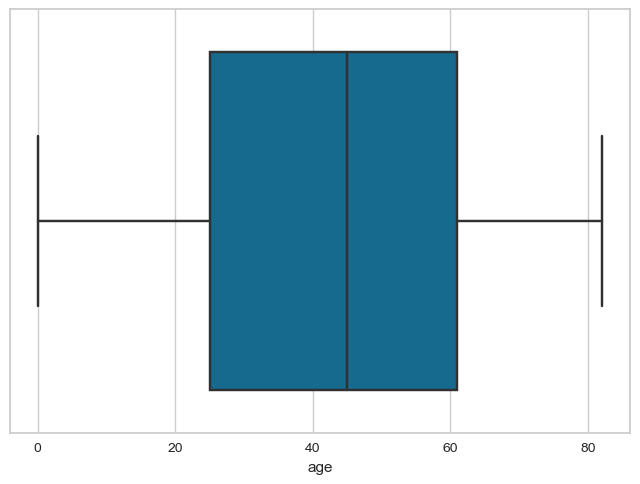

In [199]:
sns.boxplot(x=df['age'])

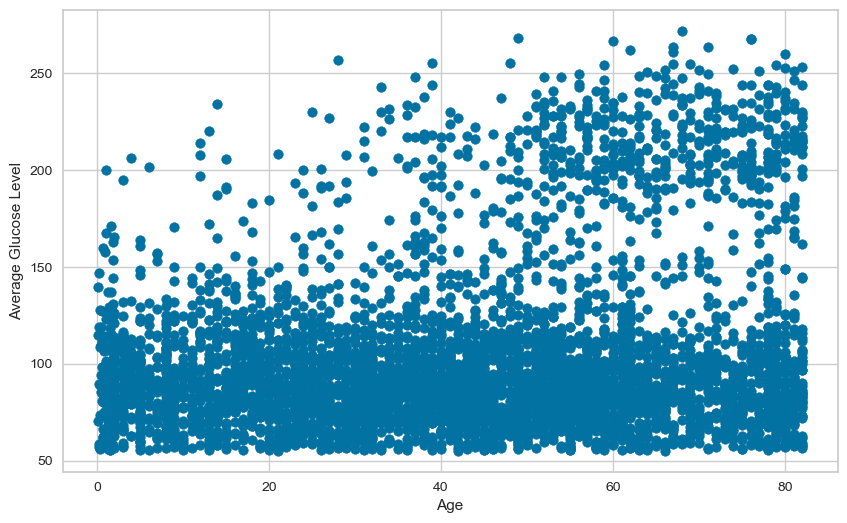

In [200]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['age'], df['avg_glucose_level'])
ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
plt.show()

Bivariate Analysis

In [201]:
df[['age','avg_glucose_level']].corr()

,age,avg_glucose_level
age,1.000000,0.236763
avg_glucose_level,0.236763,1.000000


In [202]:
df[['age','bmi']].corr()

,age,bmi
age,1.000000,0.373703
bmi,0.373703,1.000000


Multivariate Analysis

/tmp/ipykernel_25685/2967277355.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


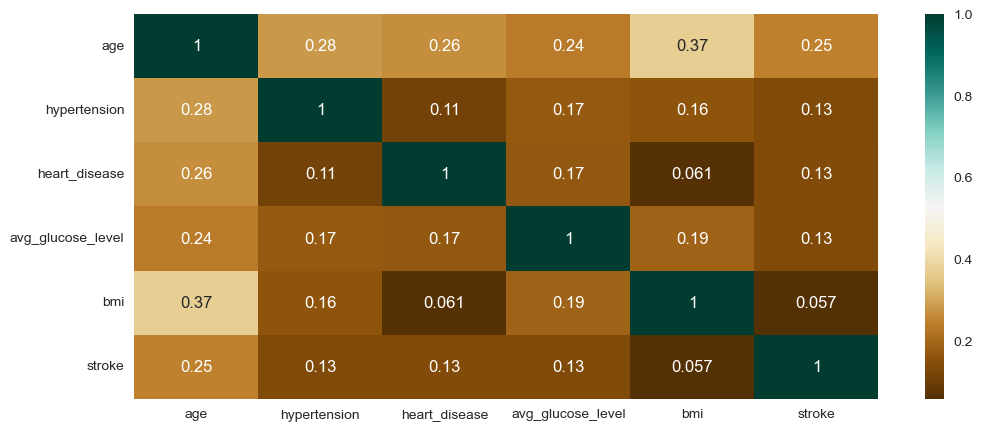

In [203]:
plt.figure(figsize=(12,5))
c = df.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

In [204]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [205]:
df_full_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4019,Male,30.0,0,0,No,Private,Urban,113.08,41.8,Unknown,0
2565,Female,79.0,0,0,No,Self-employed,Urban,79.20,32.6,never smoked,0
1630,Male,31.0,0,0,Yes,Private,Rural,100.52,29.9,Unknown,0
4284,Male,37.0,0,0,Yes,Private,Urban,176.42,39.7,Unknown,0
205,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,Male,22.0,0,0,No,Private,Rural,86.53,20.8,never smoked,0
2763,Male,42.0,0,0,Yes,Private,Rural,107.83,35.3,smokes,0
905,Male,82.0,0,1,Yes,Self-employed,Rural,72.93,27.1,formerly smoked,0
3980,Female,5.0,0,0,No,children,Urban,91.30,20.7,Unknown,0


In [206]:
y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values


del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

# Decision Tree Parameters Tuning

In [207]:
dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

In [208]:
dv.get_feature_names_out()

array(['Residence_type=Rural', 'Residence_type=Urban', 'age',
       'avg_glucose_level', 'bmi', 'ever_married=No', 'ever_married=Yes',
       'gender=Female', 'gender=Male', 'heart_disease', 'hypertension',
       'smoking_status=Unknown', 'smoking_status=formerly smoked',
       'smoking_status=never smoked', 'smoking_status=smokes',
       'work_type=Govt_job', 'work_type=Private',
       'work_type=Self-employed', 'work_type=children'], dtype=object)

In [209]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [210]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [211]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [212]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.751  0.720  0.720
5                 0.729  0.715  0.683
10                0.729  0.714  0.677
15                0.714  0.706  0.704
20                0.729  0.703  0.710
100               0.747  0.743  0.743
200               0.768  0.768  0.768
500               0.770  0.770  0.770

# Random Forest Parameters Tuning

In [213]:
max_depth = 10

In [214]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [215]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

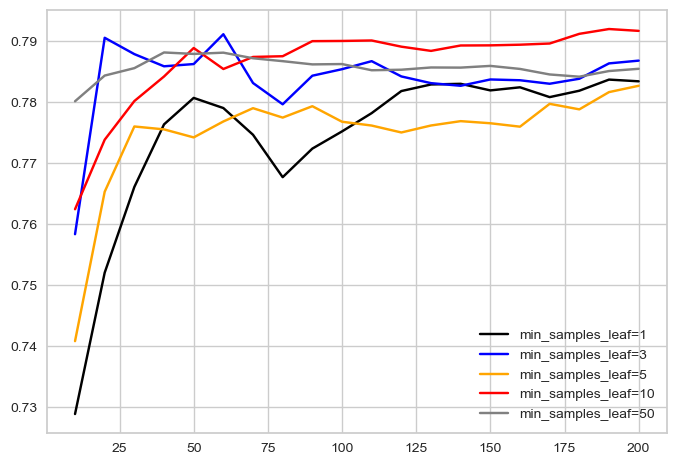

In [216]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

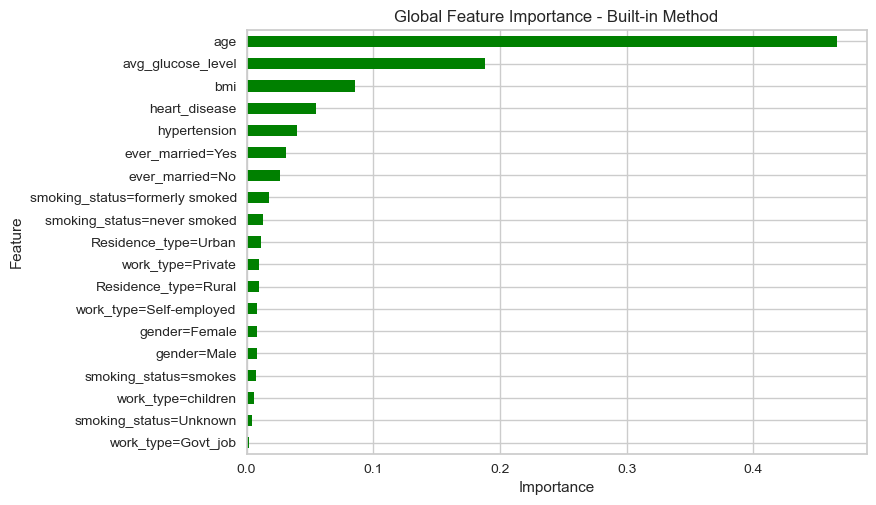

In [217]:
global_importances = pd.Series(rf.feature_importances_, index=dv.get_feature_names_out(X_train))
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

# Selecting the best model

In [226]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [227]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7028424886322007

In [228]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=10,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200,
                       random_state=1)

In [229]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7916298515182207